In [259]:
from sklearn import svm
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [260]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import umap

In [261]:
# # Load dataset
# df = pd.read_csv("39-features-combined.csv")
# df

In [262]:
# df = df.drop(columns=["file"])

In [263]:
# X = df.iloc[:, 0:39]
# y = df.iloc[:, 39]
# feature_names = list(X.columns)
# target_names = list(y.unique())

In [264]:
# X = df.iloc[:, 0:39]
# y = df.iloc[:, 39]
# feature_names = list(X.columns)
# target_names = list(y.unique())

In [265]:
# X

In [266]:
# # Original class labels
# original_labels = y

# # Mapping to recode the labels
# label_mapping = {'anthrophony': 0, 'biophony': 1, 'geophony': 2, 'other': 3}

# # Recoded labels
# recoded_labels = [label_mapping[label] for label in original_labels]

# # Print the original and recoded labels
# print("Original labels:", original_labels)
# print("Recoded labels:", recoded_labels)

# y = recoded_labels

In [267]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Prepare and scale the data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Create a PCA instance
# pca = PCA(n_components=7)

# # Fit the data to PCA
# pca.fit(X_scaled)

# # Transform the data to the new PCA space
# X = pca.transform(X_scaled)

In [268]:
# from sklearn.manifold import TSNE
# X = TSNE(n_components=3, learning_rate=150, perplexity=50, verbose=2, angle=0.1, random_state=0).fit_transform(X)

In [269]:
# import umap
# X = umap.UMAP(n_components=3, random_state=0, n_neighbors=6,
#         min_dist=0.1).fit_transform(X)

Modified to use two datasets

In [270]:
# Load dataset
df = pd.read_csv("39-feature-vector.csv")
df

,class,0,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,38
0,anthrophony,0.626714,0.827684,0.930313,0.501803,0.542249,0.468979,0.318348,0.379219,0.426658,...,0.070683,0.079686,0.085407,0.084761,0.075187,0.072029,0.073790,0.079146,0.084986,0.092545
1,anthrophony,0.461087,0.744750,0.883125,0.514840,0.533231,0.482730,0.353830,0.435641,0.525935,...,0.128797,0.128452,0.136328,0.137922,0.135077,0.131882,0.124851,0.128193,0.128049,0.129284
2,anthrophony,0.390126,0.682046,0.955433,0.424473,0.592745,0.418916,0.387924,0.392779,0.492717,...,0.140188,0.133408,0.141130,0.136032,0.134554,0.134804,0.134235,0.133575,0.133459,0.136899
3,anthrophony,0.664164,0.821859,1.000000,0.475881,0.561929,0.409417,0.350974,0.338424,0.422630,...,0.041718,0.041547,0.050154,0.044924,0.036704,0.034917,0.036167,0.037872,0.044116,0.047740
4,anthrophony,0.359122,0.657137,0.954445,0.442800,0.623291,0.419816,0.392054,0.391199,0.492590,...,0.124112,0.118943,0.126383,0.119483,0.116559,0.116601,0.116413,0.116972,0.119721,0.124027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6599,other,0.230966,0.569598,0.795762,0.554628,0.642260,0.591072,0.436866,0.547585,0.436631,...,0.101700,0.102209,0.105817,0.106501,0.095956,0.095646,0.096040,0.097561,0.101006,0.108054
6600,other,0.222576,0.571416,0.786815,0.554614,0.633529,0.569845,0.417258,0.526320,0.420969,...,0.148462,0.142680,0.144562,0.144662,0.132111,0.130482,0.134250,0.131713,0.133691,0.141131
6601,other,0.207785,0.558981,0.778578,0.544905,0.638189,0.579981,0.426273,0.544027,0.418871,...,0.141598,0.142239,0.146732,0.144848,0.145634,0.149111,0.144374,0.145140,0.145477,0.149187
6602,other,0.179243,0.538048,0.772647,0.538000,0.643699,0.573222,0.414198,0.501620,0.419401,...,0.196654,0.193573,0.197527,0.198125,0.191823,0.195113,0.193040,0.195639,0.190391,0.202831


In [271]:
# X = df.iloc[:, 0:13]
# y = df['class']

X = df.iloc[:, 1:14]
y = df.iloc[:, 0]
feature_names = list(X.columns)
target_names = list(y.unique())

In [272]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_PCA(X):
    # Prepare and scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create a PCA instance
    pca = PCA(n_components=7)

    # Fit the data to PCA
    pca.fit(X_scaled)

    # Transform the data to the new PCA space
    X = pca.transform(X_scaled)

    return X

In [273]:
import umap

def apply_umap(X):
    X = umap.UMAP(n_components=3, random_state=0, n_neighbors=6,
            min_dist=0.1).fit_transform(X)
    return X

In [274]:
from sklearn.manifold import TSNE

def apply_tsne(X):
    X = TSNE(n_components=3, learning_rate=150, perplexity=50, verbose=2, angle=0.1).fit_transform(X)
    return X

In [275]:
X = apply_umap(X)

In [276]:
def load_test_data():
    test_data = pd.read_csv("39-features-wambiana.csv")

    y_test = test_data['class']
    X_test = test_data.iloc[:, 0:13]
    X_test = apply_umap(X_test)
    
    return X_test, y_test

In [277]:
X_test, y_test = load_test_data()
X_test

array([[ 1.0013173, -1.200302 ,  4.429113 ],
       [ 1.0474678, -1.30071  ,  4.5627728],
       [ 0.9838603, -1.1960287,  4.4386044],
       ...,
       [-1.8166122,  9.159828 ,  7.3590198],
       [-1.9295017,  9.204803 ,  7.436362 ],
       [-2.8053603,  9.281468 ,  7.7776866]], dtype=float32)

below - latest

ANN: Accuracy=0.9667, Precision=0.9526, Recall=0.9527, F1-Score=0.9525


c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


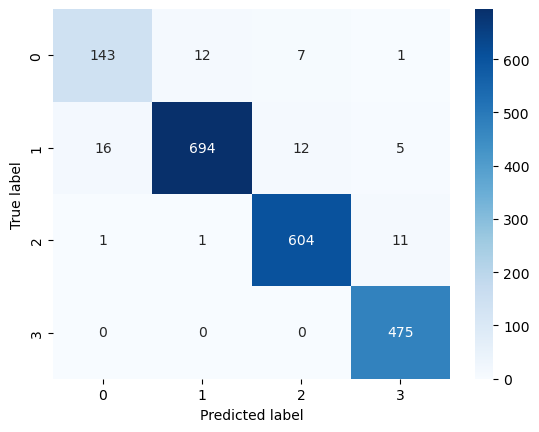

              precision    recall  f1-score   support

 anthrophony       0.89      0.88      0.89       163
    biophony       0.98      0.95      0.97       727
    geophony       0.97      0.98      0.97       617
       other       0.97      1.00      0.98       475

    accuracy                           0.97      1982
   macro avg       0.95      0.95      0.95      1982
weighted avg       0.97      0.97      0.97      1982



In [278]:
from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

classifiers = {
    #'SVM': svm.SVC(),
    #'DT': tree.DecisionTreeClassifier(),
    'ANN': MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10, 10)),
    #'kNN': KNeighborsClassifier(n_neighbors=5),
    #'Bayes': GaussianNB()
}

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Fit the model on the training data
    
    y_pred = clf.predict(X_test)  # Make predictions on the test data
    
    # Calculate evaluation metrics on the test data
    acc = clf.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
    # Generate decision tree diagram and feature importance for DT classifier
    if name == 'DT':
        plt.figure(figsize=(20, 10))
        plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
        plt.show()
        print(f"Feature importances: {clf.feature_importances_}")

    print(classification_report(y_test, y_pred, target_names=target_names))


In [279]:
# from sklearn import svm, tree
# from sklearn.model_selection import cross_validate, train_test_split
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# classifiers = {
#     'SVM': svm.SVC(),
#     'DT': tree.DecisionTreeClassifier(),
#     #'ANN': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)),
#     'kNN': KNeighborsClassifier(n_neighbors=5),
#     'Bayes': GaussianNB()
# }

# scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# X_test, y_test = load_test_data()  # Load the second dataset for testing

# for name, clf in classifiers.items():
#     cv_results = cross_validate(clf, X_train, y_train, cv=10, scoring=scoring)
#     print(cv_results)
#     acc = cv_results['test_accuracy'].mean()
#     precision = cv_results['test_precision_macro'].mean()
#     recall = cv_results['test_recall_macro'].mean()
#     f1 = cv_results['test_f1_macro'].mean()
#     print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

#     y_pred = cross_val_predict(clf, X_test, y_test, cv=10)
#     cm = confusion_matrix(y_test, y_pred)
#     plt.figure()
#     sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#     plt.xlabel('Predicted label')
#     plt.ylabel('True label')
#     plt.show()
#     # Generate decision tree diagram and feature importance for DT classifier
#     if name == 'DT':
#         clf.fit(X_train, y_train)  # Fit the model before accessing feature importances
#         plt.figure(figsize=(20, 10))
#         plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
#         plt.show()
#         print(f"Feature importances: {clf.feature_importances_}")

#     print(classification_report(y_test, y_pred, target_names=target_names))


Below - working

In [280]:
# from sklearn import svm, tree
# from sklearn.model_selection import cross_validate, train_test_split
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# classifiers = {
#     'SVM': svm.SVC(),
#     'DT': tree.DecisionTreeClassifier(),
#     #'ANN': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)),
#     'kNN': KNeighborsClassifier(n_neighbors=5),
#     'Bayes': GaussianNB()
# }

# scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# for name, clf in classifiers.items():
#     cv_results = cross_validate(clf, X_train, y_train, cv=10, scoring=scoring)
#     print(cv_results)
#     acc = cv_results['test_accuracy'].mean()
#     precision = cv_results['test_precision_macro'].mean()
#     recall = cv_results['test_recall_macro'].mean()
#     f1 = cv_results['test_f1_macro'].mean()
#     print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

#     y_pred = cross_val_predict(clf, X_test, y_test, cv=10)
#     cm = confusion_matrix(y_test, y_pred)
#     plt.figure()
#     sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#     plt.xlabel('Predicted label')
#     plt.ylabel('True label')
#     plt.show()
#     # Generate decision tree diagram and feature importance for DT classifier
#     if name == 'DT':
#         clf.fit(X_train, y_train)  # Fit the model before accessing feature importances
#         plt.figure(figsize=(20, 10))
#         plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
#         plt.show()
#         print(f"Feature importances: {clf.feature_importances_}")

#     print(classification_report(y_test, y_pred, target_names=target_names))


In [281]:
# from sklearn import svm, tree
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# classifiers = {
#     'SVM': svm.SVC(),
#     'DT': tree.DecisionTreeClassifier(),
#     #'ANN': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)),
#     'kNN': KNeighborsClassifier(n_neighbors=5),
#     'Bayes': GaussianNB()
# }

# scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# for name, clf in classifiers.items():
#     cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring)
#     print(cv_results)
#     acc = cv_results['test_accuracy'].mean()
#     precision = cv_results['test_precision_macro'].mean()
#     recall = cv_results['test_recall_macro'].mean()
#     f1 = cv_results['test_f1_macro'].mean()
#     print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

#     y_pred = cross_val_predict(clf, X, y, cv=10)
#     cm = confusion_matrix(y, y_pred)
#     plt.figure()
#     sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
#     plt.xlabel('Predicted label')
#     plt.ylabel('True label')
#     plt.show()
#     # Generate decision tree diagram and feature importance for DT classifier
#     if name == 'DT':
#         clf.fit(X, y)  # Fit the model before accessing feature importances
#         plt.figure(figsize=(20, 10))
#         plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
#         plt.show()
#         print(f"Feature importances: {clf.feature_importances_}")
    
#     print(classification_report(y, y_pred, target_names=target_names))

https://umap-learn.readthedocs.io/en/latest/supervised.html#using-labels-to-separate-classes-supervised-umap

In [282]:
embedding = umap.UMAP().fit_transform(X_train, y=y_train)

ValueError: could not convert string to float: 'geophony'

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Accuracy:", accuracy)

Precision: 0.6950777380200851
Recall: 0.7154381137462863
F1 score: 0.6960164553892401
Accuracy: 0.7013857845328565


Text(0.5, 1.0, 'Tarcutta Embedded via UMAP using Labels')

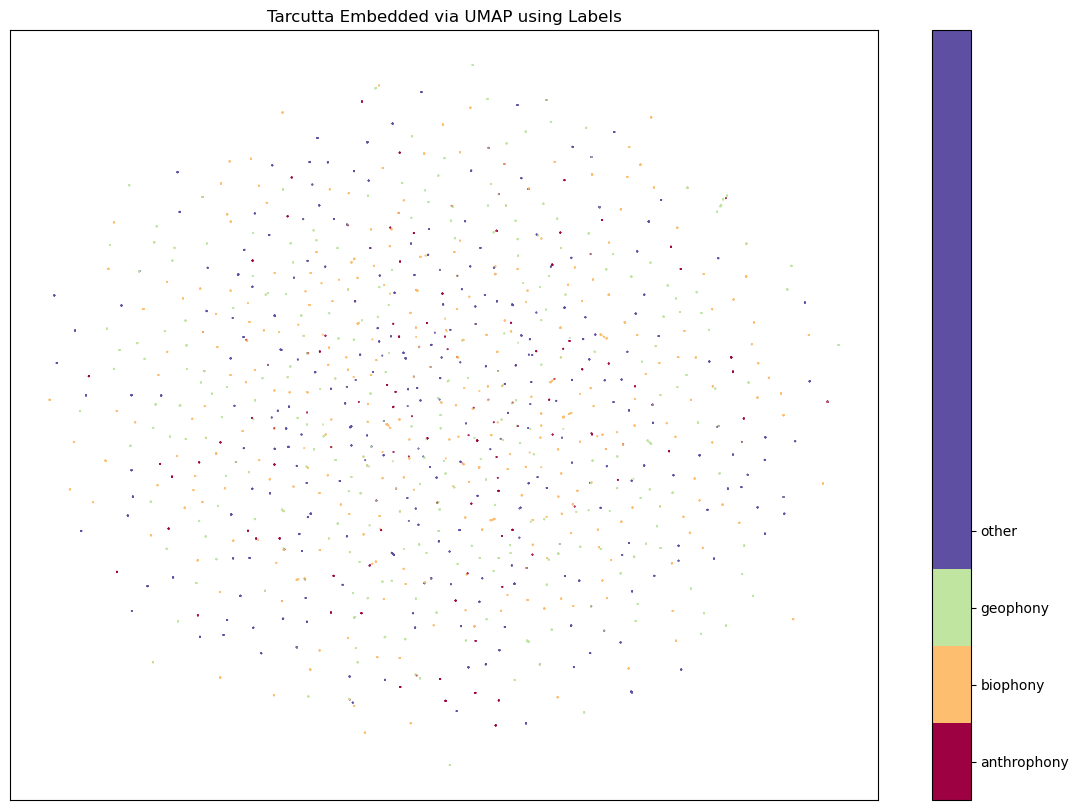

In [ ]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.1, c=y_train, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(4))
cbar.set_ticklabels(target_names)
plt.title('Tarcutta Embedded via UMAP using Labels')

Semi-supervised learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv("39-features-tarcutta.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: '39-features-tarcutta.csv'

In [ ]:
X = df.iloc[:, 0:39]
y = df.iloc[:, 39]
feature_names = list(X.columns)
target_names = list(y.unique())

In [ ]:
# Original class labels
original_labels = y

# Mapping to recode the labels
label_mapping = {'anthrophony': 0, 'biophony': 1, 'geophony': 2, 'other': 3}

# Recoded labels
recoded_labels = [label_mapping[label] for label in original_labels]

# Print the original and recoded labels
print("Original labels:", original_labels)
print("Recoded labels:", recoded_labels)

y = recoded_labels

Original labels: 0       anthrophony
1       anthrophony
2       anthrophony
3       anthrophony
4       anthrophony
           ...     
8836          other
8837          other
8838          other
8839          other
8840          other
Name: class, Length: 8841, dtype: object
Recoded labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

C:\Users\Thomas\AppData\Local\Temp\ipykernel_31328\3908154788.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Replace with the desired colormap


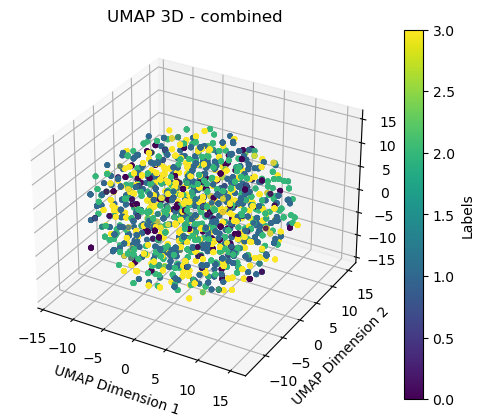

In [ ]:
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have your data stored in a variable called "data"
# Make sure your data is in the shape of (n_samples, n_features)
# Assuming you have a column of labels stored in a variable called "labels"

# Initialize UMAP with desired parameters
reducer = umap.UMAP(n_components=3, random_state=0, n_neighbors=6, min_dist=0.1)

# Perform dimension reduction
X = reducer.fit_transform(X)

cmap = plt.cm.get_cmap('viridis')  # Replace with the desired colormap

# Plot the reduced dimensions in a 3D scatterplot with colormap
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap, s=10)
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')
ax.set_title('UMAP 3D - combined')

# Add a colorbar to the plot
cbar = fig.colorbar(sc)
cbar.set_label('Labels')

plt.show()


In [ ]:
X = (X - X.min()) / (X.max() - X.min())
X

array([[0.5445447 , 0.15434837, 0.13262406],
       [0.18734385, 0.5101783 , 0.5531743 ],
       [0.48112464, 0.34477472, 0.7682963 ],
       ...,
       [0.6565027 , 0.31297365, 0.48023638],
       [0.5806706 , 0.16490805, 0.40525317],
       [0.4037463 , 0.31138366, 0.32959333]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Define unlabelled data

In [ ]:
X_train, X_unl, y_train, y_unl = train_test_split(X_train, y_train, test_size=0.7, random_state=42)

In [ ]:
from sklearn.svm import SVC
clf = SVC().fit(X_train, y_train)
clf.score(X_test, y_test)

0.4530719939690916

In [ ]:
# import numpy as np
# from scipy.spatial.distance import cdist

# def compute_cohesion(X, labels):
#     unique_labels = np.unique(labels)
#     cohesion = 0.0
#     for label in unique_labels:
#         cluster_points = X[labels == label]
#         pairwise_distances = cdist(cluster_points, cluster_points, metric='euclidean')
#         avg_pairwise_distance = np.mean(pairwise_distances)
#         cohesion += avg_pairwise_distance
#     cohesion /= len(unique_labels)
#     return cohesion

# def compute_separation(X, labels):
#     unique_labels = np.unique(labels)
#     separation = 0.0
#     for i in range(len(unique_labels)):
#         for j in range(i+1, len(unique_labels)):
#             cluster_points_1 = X[labels == unique_labels[i]]
#             cluster_points_2 = X[labels == unique_labels[j]]
#             pairwise_distances = cdist(cluster_points_1, cluster_points_2, metric='euclidean')
#             avg_pairwise_distance = np.mean(pairwise_distances)
#             separation += avg_pairwise_distance
#     total_pairs = len(unique_labels) * (len(unique_labels) - 1) / 2  # Number of unique cluster pairs
#     separation /= total_pairs
#     return separation

In [ ]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score
# from sklearn.cluster import KMeans

# # Step 1: Split labeled dataset
# X_labeled_train, X_labeled_eval, y_labeled_train, y_labeled_eval = train_test_split(X, y, test_size=0.3)

# # Step 2: Train a supervised learning model
# model = svm.SVC()
# model.fit(X_labeled_train, y_labeled_train)

# # Step 3: Apply the model to unlabeled data
# unlabeled_predictions = model.predict(X_unlabeled)

# # Step 4: Calculate internal validity metrics
# kmeans = KMeans(n_clusters=n_clusters)
# cluster_labels = kmeans.fit_predict(X_unlabeled)
# cohesion = compute_cohesion(X_unlabeled, cluster_labels)  # Implement your own cohesion calculation
# separation = compute_separation(X_unlabeled, cluster_labels)  # Implement your own separation calculation

# # Step 5: Evaluate model's performance on labeled data
# y_pred_eval = model.predict(X_labeled_eval)
# accuracy = accuracy_score(y_labeled_eval, y_pred_eval)

# # Print results
# print("Accuracy on labeled evaluation set:", accuracy)
# print("Cohesion:", cohesion)
# print("Separation:", separation)

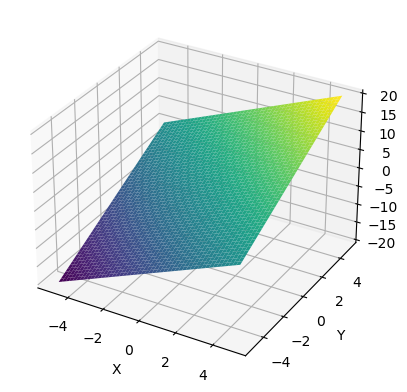

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the ranges and number of points for the x, y, and z axes
start_x = -5
end_x = 5
num_points_x = 50

start_y = -5
end_y = 5
num_points_y = 50

# Create the coordinate grid
x = np.linspace(start_x, end_x, num_points_x)
y = np.linspace(start_y, end_y, num_points_y)
X, Y = np.meshgrid(x, y)

# Calculate the values for the z-axis based on a dummy function (example: z = x^2 + y^2)
Z = X*2 + Y*2

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the grid search surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


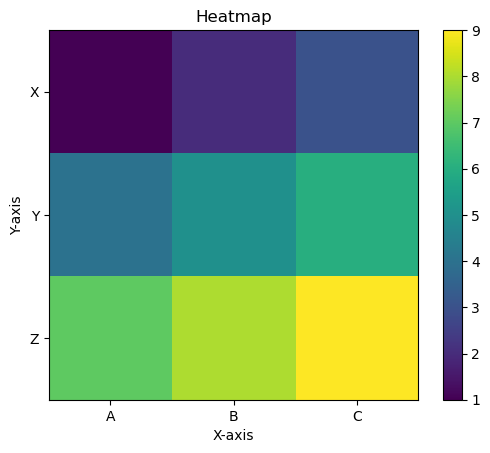

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare your data as a 2D array or a pandas DataFrame
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Create the heatmap
plt.imshow(data, cmap='viridis')
plt.colorbar()

# Customize the plot
plt.title('Heatmap')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xticks(np.arange(data.shape[1]), ['A', 'B', 'C'])  # Set custom tick labels for the x-axis
plt.yticks(np.arange(data.shape[0]), ['X', 'Y', 'Z'])  # Set custom tick labels for the y-axis

# Show the plot
plt.show()


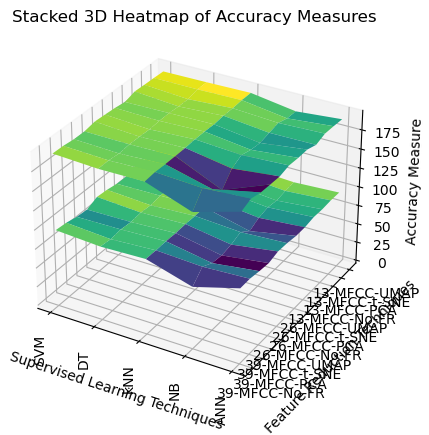

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the first CSV file using pandas
df1 = pd.read_csv('C:\\Users\\Thomas\\Desktop\\PhD\\Paper 2 - AJCAI2023\\tarcutta.csv')  # Replace 'file1.csv' with the actual path to the first CSV file

# Read the second CSV file using pandas
df2 = pd.read_csv('C:\\Users\\Thomas\\Desktop\\PhD\\Paper 2 - AJCAI2023\\wambiana.csv')  # Replace 'file2.csv' with the actual path to the second CSV file

# Extract the supervised learning techniques and feature reduction techniques from the first DataFrame
supervised_learning_techniques = ["SVM", "DT", "kNN", "NB", "ANN"]
feature_reduction_techniques = df1['Feature Reduction Technique'].tolist()

# Remove the feature reduction column from both DataFrames
df1 = df1.drop(columns=df1.columns[0])
df2 = df2.drop(columns=df2.columns[0])

# Convert the data from both DataFrames to numpy arrays
accuracy_data1 = df1.values
accuracy_data2 = df2.values

# Ensure both accuracy data arrays have the same shape
accuracy_data2 = accuracy_data2[:accuracy_data1.shape[0], :accuracy_data1.shape[1]]

# Create a meshgrid for the X and Y axes
X, Y = np.meshgrid(range(len(supervised_learning_techniques)), range(len(feature_reduction_techniques)))

# Create a figure and 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the first heatmap
ax.plot_surface(X, Y, accuracy_data1, cmap='viridis', edgecolor='none')

# Set labels for the axes
ax.set_xlabel('Supervised Learning Techniques')
ax.set_ylabel('Feature Reduction Techniques')
ax.set_zlabel('Accuracy Measure')

# Set the title
ax.set_title('Stacked 3D Heatmap of Accuracy Measures')

# Customize ticks and tick labels
ax.set_xticks(range(len(supervised_learning_techniques)))
ax.set_xticklabels(supervised_learning_techniques, rotation=90)
ax.set_yticks(range(len(feature_reduction_techniques)))
ax.set_yticklabels(feature_reduction_techniques)

# Shift the second heatmap above the first one
ax.set_zlim(0, np.max(accuracy_data1) + np.max(accuracy_data2))

# Plot the second heatmap with increased height
ax.plot_surface(X, Y, accuracy_data2 + np.max(accuracy_data1), cmap='viridis', edgecolor='none')

# Show the plot
plt.show()

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the first CSV file using pandas
df1 = pd.read_csv('C:\\Users\\Thomas\\Desktop\\PhD\\Paper 2 - AJCAI2023\\tarcutta.csv')  # Replace 'file1.csv' with the actual path to the first CSV file

# Read the second CSV file using pandas
df2 = pd.read_csv('C:\\Users\\Thomas\\Desktop\\PhD\\Paper 2 - AJCAI2023\\wambiana.csv')  # Replace 'file2.csv' with the actual path to the second CSV file

# Extract the supervised learning techniques and feature reduction techniques from the first DataFrame
supervised_learning_techniques = ["SVM", "DT", "kNN", "NB", "ANN"]
feature_reduction_techniques = df1['Feature Reduction Technique'].tolist()

# Convert the data from both DataFrames to numpy arrays
accuracy_data1 = df1.values
accuracy_data2 = df2.values

# Create a colormap for the continuous values
cmap = plt.get_cmap('viridis')

# Create a figure and 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for the X and Y axes
X, Y = np.meshgrid(range(len(supervised_learning_techniques)), range(len(feature_reduction_techniques)))


# Plot the first heatmap with the accuracy mapped to the Tarcutta category
ax.plot_surface(X, Y, np.zeros_like(X), facecolors=cmap(accuracy_data1.flatten()), edgecolor='none')

# Plot the second heatmap with the accuracy mapped to the Wambiana category
ax.plot_surface(X, Y, np.ones_like(X), facecolors=cmap(accuracy_data2.flatten()), edgecolor='none')

# Set the z-axis category labels
ax.set_zticks([0, 1])
ax.set_zticklabels(["Tarcutta", "Wambiana"])

# Set the colorbar for the continuous values
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax)
cbar.set_label('Accuracy')

# Set labels for the axes
ax.set_xlabel('Supervised Learning Techniques')
ax.set_ylabel('Feature Reduction Techniques')

# Set the title
ax.set_title('Stacked 3D Heatmap of Accuracy Measures')

# Set the ticks and tick labels
ax.set_xticks(np.arange(len(supervised_learning_techniques)))
ax.set_yticks(np.arange(len(feature_reduction_techniques)))
ax.set_xticklabels(supervised_learning_techniques, rotation=90)
ax.set_yticklabels(feature_reduction_techniques)

# Show the plot
plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

[[96.56  92.88  94.76  77.26  94.12 ]
 [95.28  91.3   94.66  91.63  94.61 ]
 [92.15  93.01  95.09  84.75  92.69 ]
 [90.98  91.74  94.61  83.38  91.49 ]
 [97.08  93.32  95.48  86.2   95.2  ]
 [95.98  92.28  95.24  91.41  94.7  ]
 [93.57  94.35  95.82  81.7   92.94 ]
 [93.36  93.06  95.05  88.29  93.23 ]
 [97.77  93.94  96.82  91.35  95.61 ]
 [96.32  91.74  95.26  89.64  95.14 ]
 [96.65  95.095 97.1   91.97  96.23 ]
 [95.95  95.44  96.37  93.12  96.02 ]]
[[0.94100439 0.76157972 0.85324232 0.         0.82203803]
 [0.87859581 0.68454412 0.84836665 0.70063384 0.84592882]
 [0.72598732 0.76791809 0.86933203 0.36518771 0.75231594]
 [0.66894198 0.70599707 0.84592882 0.29839103 0.6938079 ]
 [0.96635787 0.78303267 0.88834715 0.43588493 0.87469527]
 [0.9127255  0.73232569 0.87664554 0.68990736 0.85031692]
 [0.79522184 0.83325207 0.90492443 0.21647977 0.76450512]
 [0.78498294 0.77035592 0.86738176 0.53778645 0.77864456]
 [1.         0.81326182 0.95368113 0.68698196 0.89468552]
 [0.92930278 0.705997

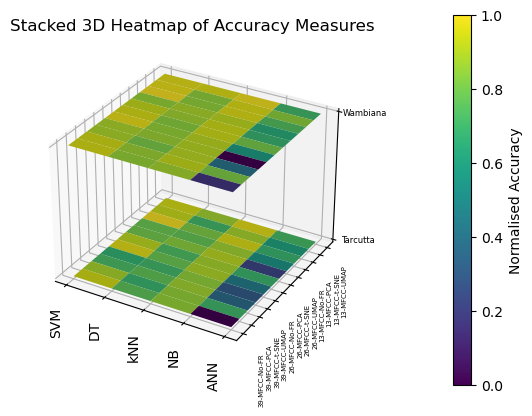

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Read the first CSV file using pandas
df1 = pd.read_csv('C:\\Users\\Thomas\\Desktop\\PhD\\Paper 2 - AJCAI2023\\tarcutta.csv')  # Replace 'file1.csv' with the actual path to the first CSV file

# Read the second CSV file using pandas
df2 = pd.read_csv('C:\\Users\\Thomas\\Desktop\\PhD\\Paper 2 - AJCAI2023\\wambiana.csv')  # Replace 'file2.csv' with the actual path to the second CSV file

# Extract the supervised learning techniques and feature reduction techniques from the first DataFrame
supervised_learning_techniques = ["SVM", "DT", "kNN", "NB", "ANN"]
feature_reduction_techniques = df1['Feature Reduction Technique'].tolist()

# Remove the feature reduction column from both DataFrames
df1 = df1.drop(columns=df1.columns[0])
df2 = df2.drop(columns=df2.columns[0])

# Convert the data from both DataFrames to numpy arrays
accuracy_data1 = df1.values
accuracy_data2 = df2.values

print(accuracy_data1)

# Normalize the accuracy data between 0 and 1
normalized_data1 = (accuracy_data1 - np.nanmin(accuracy_data1)) / (np.nanmax(accuracy_data1) - np.nanmin(accuracy_data1))
normalized_data2 = (accuracy_data2 - np.nanmin(accuracy_data2)) / (np.nanmax(accuracy_data2) - np.nanmin(accuracy_data2))

print(normalized_data1)

# Create a colormap for the continuous values
cmap = plt.get_cmap('viridis')

# Convert normalized values to RGBA colors using the colormap
colors1 = cmap(normalized_data1)
colors2 = cmap(normalized_data2)

# Create a figure and 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for the X and Y axes
X, Y = np.meshgrid(range(normalized_data1.shape[1]), range(normalized_data1.shape[0]))

# Plot the first heatmap with the accuracy mapped to the Tarcutta category
ax.plot_surface(X, Y, np.zeros_like(X), facecolors=colors1, edgecolor='none')

# Plot the second heatmap with the accuracy mapped to the Wambiana category
ax.plot_surface(X, Y, np.ones_like(X), facecolors=colors2, edgecolor='none')

# Set the z-axis category labels
ax.set_zticks([0, 1])
ax.set_zticklabels(["Tarcutta", "Wambiana"])

# Set the colorbar for the continuous values
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, pad=0.2)
cbar.set_label('Normalised Accuracy')

# Set the title
ax.set_title('Stacked 3D Heatmap of Accuracy Measures')

# Set the ticks and tick labels
ax.set_xticks(np.arange(len(supervised_learning_techniques)))
ax.set_yticks(np.arange(len(feature_reduction_techniques)))
ax.set_xticklabels(supervised_learning_techniques, rotation=90)
ax.set_yticklabels(feature_reduction_techniques, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=5)
plt.tick_params(axis='z', which='major', labelsize=6)


# Show the plot
plt.show()


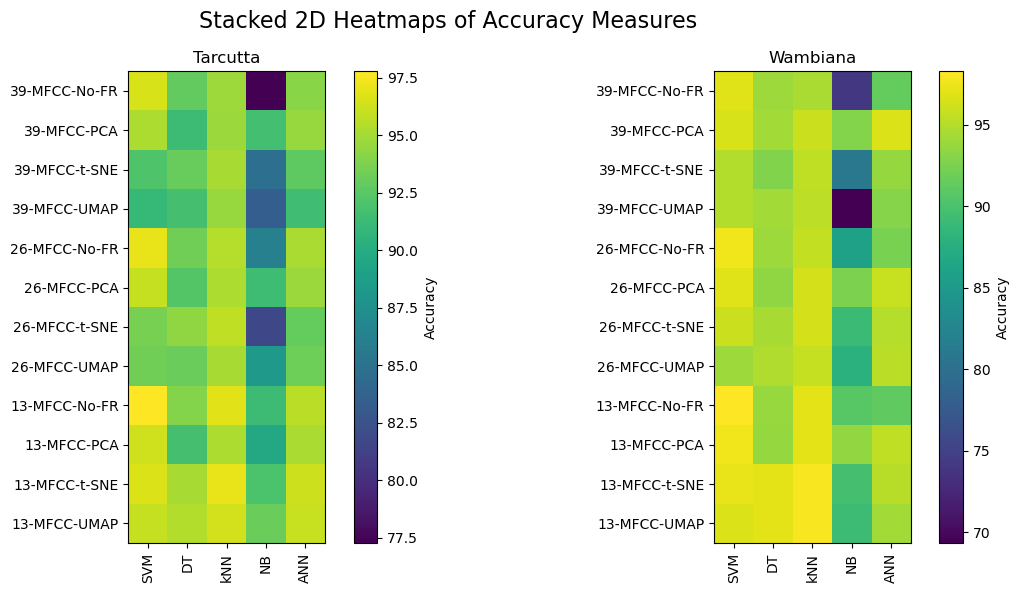

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the first CSV file using pandas
df1 = pd.read_csv('C:\\Users\\Thomas\\Desktop\\PhD\\Paper 2 - AJCAI2023\\tarcutta.csv')

# Read the second CSV file using pandas
df2 = pd.read_csv('C:\\Users\\Thomas\\Desktop\\PhD\\Paper 2 - AJCAI2023\\wambiana.csv')

# Extract the supervised learning techniques and feature reduction techniques from the first DataFrame
supervised_learning_techniques = ["SVM", "DT", "kNN", "NB", "ANN"]
feature_reduction_techniques = df1['Feature Reduction Technique'].tolist()

# Remove the feature reduction column from both DataFrames
df1 = df1.drop(columns=df1.columns[0])
df2 = df2.drop(columns=df2.columns[0])

# Convert the data from both DataFrames to numpy arrays
accuracy_data1 = df1.values
accuracy_data2 = df2.values

# Create a figure and subplots for each z-axis value
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Create a colormap for the continuous values
cmap = plt.get_cmap('viridis')

# Plot the first heatmap for Tarcutta
im1 = axs[0].imshow(accuracy_data1, cmap=cmap)
axs[0].set_xticks(np.arange(len(supervised_learning_techniques)))
axs[0].set_yticks(np.arange(len(feature_reduction_techniques)))
axs[0].set_xticklabels(supervised_learning_techniques, rotation=90)
axs[0].set_yticklabels(feature_reduction_techniques)
axs[0].set_title('Tarcutta')
fig.colorbar(im1, ax=axs[0], label='Accuracy')

# Plot the second heatmap for Wambiana
im2 = axs[1].imshow(accuracy_data2, cmap=cmap)
axs[1].set_xticks(np.arange(len(supervised_learning_techniques)))
axs[1].set_yticks(np.arange(len(feature_reduction_techniques)))
axs[1].set_xticklabels(supervised_learning_techniques, rotation=90)
axs[1].set_yticklabels(feature_reduction_techniques)
axs[1].set_title('Wambiana')
fig.colorbar(im2, ax=axs[1], label='Accuracy')

# Set the overall title
fig.suptitle('Stacked 2D Heatmaps of Accuracy Measures', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


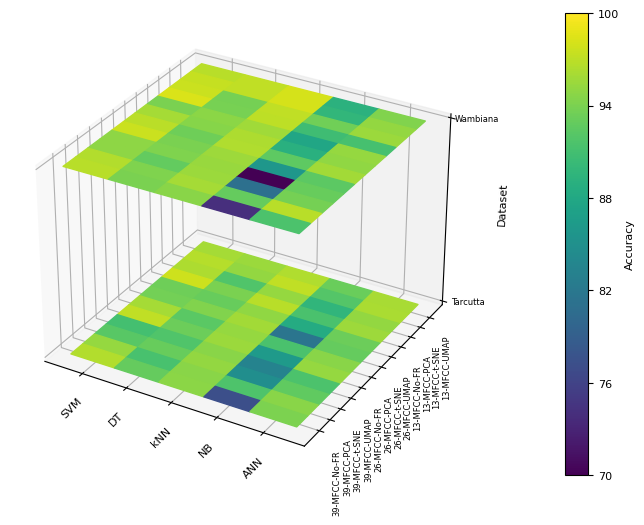

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the first CSV file using pandas
df1 = pd.read_csv('C:\\Users\\Thomas\\Desktop\\PhD\\Paper 2 - AJCAI2023\\tarcutta.csv')

# Read the second CSV file using pandas
df2 = pd.read_csv('C:\\Users\\Thomas\\Desktop\\PhD\\Paper 2 - AJCAI2023\\wambiana.csv')

# Extract the supervised learning techniques and feature reduction techniques from the first DataFrame
supervised_learning_techniques = ["SVM", "DT", "kNN", "NB", "ANN"]
feature_reduction_techniques = df1['Feature Reduction Technique'].tolist()

# Remove the feature reduction column from both DataFrames
df1 = df1.drop(columns=df1.columns[0])
df2 = df2.drop(columns=df2.columns[0])

# Convert the data from both DataFrames to numpy arrays
accuracy_data1 = df1.values
accuracy_data2 = df2.values

# Subtract 70% from the data to get the 0-30% range
accuracy_data1 = accuracy_data1 - 70
accuracy_data2 = accuracy_data2 - 70

# Create a 3D figure 
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Define X, Y, Z for both datasets
X = np.arange(len(supervised_learning_techniques) + 1) - 0.5
Y = np.arange(len(feature_reduction_techniques) + 1) - 0.5
X, Y = np.meshgrid(X, Y)

# Expand accuracy matrices to fit the new grid
accuracy_data1 = np.pad(accuracy_data1, ((0, 1), (0, 1)), 'edge')
accuracy_data2 = np.pad(accuracy_data2, ((0, 1), (0, 1)), 'edge')

# Create a colormap for the continuous values
cmap = plt.get_cmap('viridis')

# Plot the first heatmap for Tarcutta at z=0
Z1 = np.zeros_like(accuracy_data1)
ax.plot_surface(X, Y, Z1, facecolors=cmap(accuracy_data1 / 30), rstride=1, cstride=1, shade=False)

# Plot the second heatmap for Wambiana at z=1
Z2 = np.ones_like(accuracy_data2)
ax.plot_surface(X, Y, Z2, facecolors=cmap(accuracy_data2 / 30), rstride=1, cstride=1, shade=False)

# Set labels
ax.set_xticks(np.arange(len(supervised_learning_techniques)))
ax.set_xticklabels(supervised_learning_techniques, rotation=45, fontsize=8)

ax.set_yticks(np.arange(len(feature_reduction_techniques)))
ax.set_yticklabels(feature_reduction_techniques, rotation=90, fontsize=6)

ax.set_zlabel('Dataset', fontsize=8)
ax.set_zticks([0, 1])
ax.set_zticklabels(['Tarcutta', 'Wambiana'], fontsize=6)

# Set colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, pad=0.10)
cbar.set_label('Accuracy', fontsize=8)
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.set_ticklabels([70, 76, 82, 88, 94, 100])
cbar.ax.tick_params(labelsize=8)


# Set the overall title
# fig.suptitle('Stacked 3D Heatmaps of Accuracy Measures', fontsize=16)

# Show the plot
plt.show()


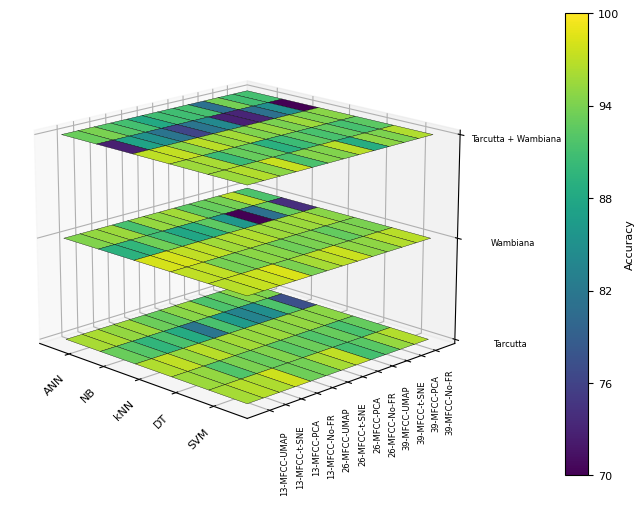

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load six datasets
file_path = 'C:\\Users\\Thomas\\Desktop\\PhD\\Paper 2 - AJCAI2023\\'
dfs = [
    pd.read_csv(file_path + 'tarcutta.csv'),
    pd.read_csv(file_path + 'wambiana.csv'),
    # Add the other four file names here
    # pd.read_csv(file_path + 'tarcutta-denoised.csv'),
    # pd.read_csv(file_path + 'wambiana-denoised.csv'),
    pd.read_csv(file_path + 'combined.csv'),
    # pd.read_csv(file_path + 'tarcutta--wambiana.csv'),
    # pd.read_csv(file_path + 'wambiana--tarcutta.csv')
]

# Extract supervised and feature reduction techniques (assuming they're the same for all datasets)
supervised_learning_techniques = ["SVM", "DT", "kNN", "NB", "ANN"]
feature_reduction_techniques = dfs[0]['Feature Reduction Technique'].tolist()

# Remove the feature reduction column from all DataFrames and convert to numpy arrays
accuracy_data = []
for df in dfs:
    df = df.drop(columns=df.columns[0])
    data = df.values
    data = data - 70  # Subtract 70% to get 0-30% range
    accuracy_data.append(data)

# Create a 3D figure 
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Define X, Y for the datasets
X = np.arange(len(supervised_learning_techniques) + 1) - 0.5
Y = np.arange(len(feature_reduction_techniques) + 1) - 0.5
X, Y = np.meshgrid(X, Y)

# Create colormap
cmap = plt.get_cmap('viridis')

# Plot the six heatmaps
# dataset_names = ['Tarcutta', 'Wambiana', 'Tarcutta (Denoised)', 'Wambiana (Denoised)', 'Tarcutta + Wambiana', 'Tarcutta -> Wambiana', 'Wambiana -> Tarcutta']
dataset_names = ['Tarcutta', 'Wambiana', 'Tarcutta + Wambiana']
for i, data in enumerate(accuracy_data):
    data = np.pad(data, ((0, 1), (0, 1)), 'edge')
    Z = np.ones_like(data) * i
    ax.plot_surface(X, Y, Z, facecolors=cmap(data / 30), edgecolor='black', linewidth=0.25, rstride=1, cstride=1, shade=False)

# Set labels and ticks
ax.set_xticks(np.arange(len(supervised_learning_techniques)))
ax.set_xticklabels(supervised_learning_techniques, rotation=45, fontsize=8)

ax.set_yticks(np.arange(len(feature_reduction_techniques)))
ax.set_yticklabels(feature_reduction_techniques, rotation=90, fontsize=6)

# Set z-ticks and adjust padding
spacing = 1
z_ticks = np.arange(len(dataset_names)) * spacing
ax.set_zticks(z_ticks)
ax.set_zticklabels(dataset_names, fontsize=6)
ax.tick_params(axis='z', which='major', pad=15)  # Increase pad value to move z-ticks further


# Set colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, pad=0.10)
cbar.set_label('Accuracy', fontsize=8)
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.set_ticklabels([70, 76, 82, 88, 94, 100])
cbar.ax.tick_params(labelsize=8)

ax.view_init(elev=17, azim=135)

# Show the plot
plt.show()


C:\Users\Thomas\AppData\Local\Temp\ipykernel_15956\3020365151.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Thomas\AppData\Local\Temp\ipykernel_15956\3020365151.py:86: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


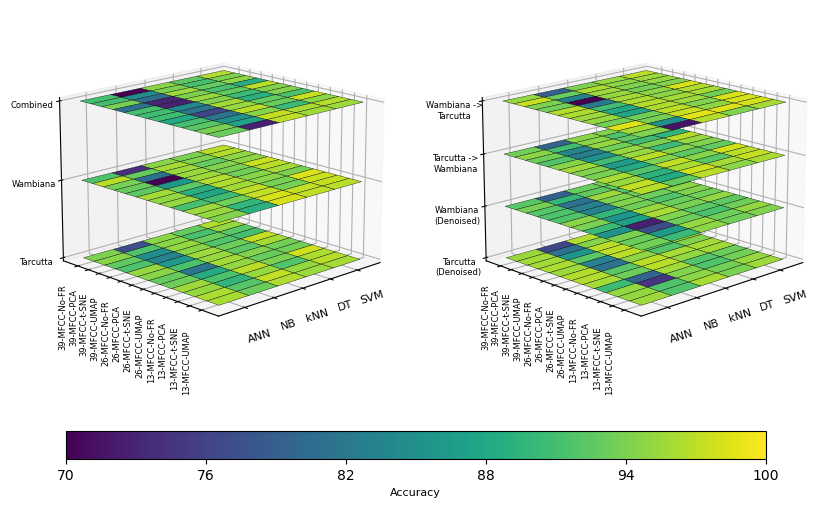

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load six datasets
file_path = 'C:\\Users\\Thomas\\Desktop\\PhD\\Paper 2 - AJCAI2023\\'
dfs = [
    pd.read_csv(file_path + 'tarcutta.csv'),
    pd.read_csv(file_path + 'wambiana.csv'),
    # Add the other four file names here
    pd.read_csv(file_path + 'combined.csv'),
    pd.read_csv(file_path + 'tarcutta-denoised.csv'),
    pd.read_csv(file_path + 'wambiana-denoised.csv'),
    pd.read_csv(file_path + 'tarcutta--wambiana.csv'),
    pd.read_csv(file_path + 'wambiana--tarcutta.csv')
]

# Extract supervised and feature reduction techniques (assuming they're the same for all datasets)
supervised_learning_techniques = ["SVM", "DT", "kNN", "NB", "ANN"]
feature_reduction_techniques = dfs[0]['Feature Reduction Technique'].tolist()

# Remove the feature reduction column from all DataFrames and convert to numpy arrays
accuracy_data = []
for df in dfs:
    df = df.drop(columns=df.columns[0])
    data = df.values
    data = data - 70  # Subtract 70% to get 0-30% range
    accuracy_data.append(data)

# Define X, Y for the datasets
X = np.arange(len(supervised_learning_techniques) + 1) - 0.5
Y = np.arange(len(feature_reduction_techniques) + 1) - 0.5
X, Y = np.meshgrid(X, Y)

# Create colormap
cmap = plt.get_cmap('viridis')

# Dataset names for the subplots
dataset_names_1 = ['Tarcutta', 'Wambiana', 'Combined']
dataset_names_2 = ['Tarcutta\n(Denoised)', 'Wambiana\n(Denoised)', 'Tarcutta ->\nWambiana', 'Wambiana ->\nTarcutta']

# Create a 2x1 subplot configuration for vertically stacked subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 14), subplot_kw={'projection': '3d'})

# Plot the first three heatmaps on the top subplot
spacing = 10
for i, data in enumerate(accuracy_data[:3]):
    data = np.pad(data, ((0, 1), (0, 1)), 'edge')
    Z = np.ones_like(data) * i * spacing
    axes[0].plot_surface(X, Y, Z, facecolors=cmap(data / 30), edgecolor='black', linewidth=0.25, rstride=1, cstride=1, shade=False)
axes[0].set_zticks(np.arange(len(dataset_names_1)) * spacing)
axes[0].set_zticklabels(dataset_names_1, fontsize=6)

# Plot the next four heatmaps on the bottom subplot
for i, data in enumerate(accuracy_data[3:]):
    data = np.pad(data, ((0, 1), (0, 1)), 'edge')
    Z = np.ones_like(data) * i * spacing
    axes[1].plot_surface(X, Y, Z, facecolors=cmap(data / 30), edgecolor='black', linewidth=0.25, rstride=1, cstride=1, shade=False)
axes[1].set_zticks(np.arange(len(dataset_names_2)) * spacing)
axes[1].set_zticklabels(dataset_names_2, fontsize=6)

# Create a custom axes for the colorbar
cbar_ax = fig.add_axes([0.15, 0.30, 0.7, 0.02])  # Adjust the second value here to move the colorbar vertically

# Set shared colorbar using the custom axes
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Accuracy', fontsize=8)
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.set_ticklabels([70, 76, 82, 88, 94, 100])

# Set shared labels, ticks, and viewing angles for both subplots
for ax in axes:
    ax.set_xticks(np.arange(len(supervised_learning_techniques)))
    ax.set_xticklabels(supervised_learning_techniques, rotation=17, fontsize=8)
    ax.set_yticks(np.arange(len(feature_reduction_techniques)))
    ax.set_yticklabels(feature_reduction_techniques, rotation=90, fontsize=6)
    ax.view_init(elev=16, azim=46)

# Move the subplots closer together
plt.subplots_adjust(hspace=0.001)

# Show the plot
plt.tight_layout()
plt.show()


In [96]:
import pandas as pd
# Load dataset
df = pd.read_csv("39-features-tarcutta-sound.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,path,class
0,0.646336,0.844683,0.543980,0.373283,0.611460,0.331930,0.753110,0.609953,0.566535,0.169309,...,0.261369,0.253211,0.247416,0.251408,0.242194,0.245324,0.249546,0.243950,D:\PhD-data\Tarcutta - Processed\anthrophony\a...,anthrophony
1,0.568359,0.783085,0.513727,0.440833,0.569069,0.363196,0.811650,0.477184,0.526423,0.287786,...,0.351950,0.353321,0.343293,0.341018,0.341530,0.343564,0.342811,0.341488,D:\PhD-data\Tarcutta - Processed\anthrophony\a...,anthrophony
2,0.605534,0.794485,0.474618,0.367434,0.576273,0.530048,0.877311,0.445860,0.517366,0.434282,...,0.291669,0.295233,0.297816,0.292029,0.288880,0.293009,0.295303,0.288725,D:\PhD-data\Tarcutta - Processed\anthrophony\a...,anthrophony
3,0.342857,0.605600,0.606426,0.531328,0.506826,0.314581,0.699506,0.385028,0.401659,0.428337,...,0.438030,0.430004,0.432435,0.428890,0.425336,0.432606,0.438634,0.437383,D:\PhD-data\Tarcutta - Processed\anthrophony\a...,anthrophony
4,0.328964,0.587936,0.569250,0.490481,0.520936,0.364828,0.806001,0.428655,0.428980,0.347441,...,0.504833,0.504263,0.504545,0.504352,0.502340,0.510355,0.514403,0.506405,D:\PhD-data\Tarcutta - Processed\anthrophony\a...,anthrophony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,0.228802,0.434234,0.774553,0.558380,0.624329,0.500528,0.521208,0.541478,0.577106,0.490285,...,0.093653,0.095979,0.094496,0.092827,0.083902,0.092052,0.096582,0.087762,D:\PhD-data\Tarcutta - Processed\other\audio_s...,other
7075,0.201230,0.409413,0.753505,0.527024,0.614602,0.541449,0.541171,0.561533,0.576810,0.539425,...,0.114818,0.111903,0.110325,0.108651,0.106088,0.113555,0.110863,0.112218,D:\PhD-data\Tarcutta - Processed\other\audio_s...,other
7076,0.149391,0.347022,0.757374,0.497583,0.651070,0.470718,0.591280,0.523762,0.660586,0.490826,...,0.129756,0.135499,0.132764,0.135778,0.133087,0.130080,0.134311,0.131803,D:\PhD-data\Tarcutta - Processed\other\audio_s...,other
7077,0.162384,0.352241,0.771799,0.502642,0.674615,0.479345,0.619002,0.523655,0.685822,0.487827,...,0.102426,0.101197,0.099734,0.102849,0.101283,0.103253,0.107666,0.095977,D:\PhD-data\Tarcutta - Processed\other\audio_s...,other


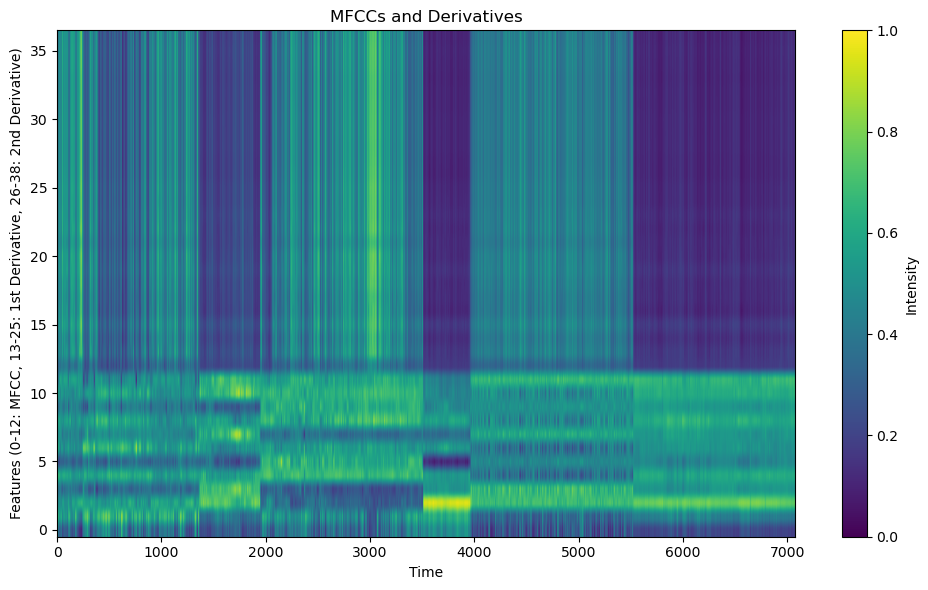

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate some data (replace this with your actual MFCCs and derivatives)
# Assuming each matrix is of size (time_steps x 13)
mfccs = df.iloc[:, 0:12]  # Replace with your MFCC data
delta_mfccs = df.iloc[:, 13:25]  # Replace with your first-order derivative data
delta2_mfccs = df.iloc[:, 26:39]  # Replace with your second-order derivative data

# Stack the data vertically
all_data = np.hstack([mfccs, delta_mfccs, delta2_mfccs])

# Create a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(all_data.T, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Intensity')
plt.ylabel('Features (0-12: MFCC, 13-25: 1st Derivative, 26-38: 2nd Derivative)')
plt.xlabel('Time')
plt.title('MFCCs and Derivatives')
plt.tight_layout()
plt.show()


In [20]:
df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,path,class
0,0.646336,0.844683,0.543980,0.373283,0.611460,0.331930,0.753110,0.609953,0.566535,0.169309,...,0.261369,0.253211,0.247416,0.251408,0.242194,0.245324,0.249546,0.243950,D:\PhD-data\Tarcutta - Processed\anthrophony\a...,anthrophony
1,0.568359,0.783085,0.513727,0.440833,0.569069,0.363196,0.811650,0.477184,0.526423,0.287786,...,0.351950,0.353321,0.343293,0.341018,0.341530,0.343564,0.342811,0.341488,D:\PhD-data\Tarcutta - Processed\anthrophony\a...,anthrophony
2,0.605534,0.794485,0.474618,0.367434,0.576273,0.530048,0.877311,0.445860,0.517366,0.434282,...,0.291669,0.295233,0.297816,0.292029,0.288880,0.293009,0.295303,0.288725,D:\PhD-data\Tarcutta - Processed\anthrophony\a...,anthrophony
3,0.342857,0.605600,0.606426,0.531328,0.506826,0.314581,0.699506,0.385028,0.401659,0.428337,...,0.438030,0.430004,0.432435,0.428890,0.425336,0.432606,0.438634,0.437383,D:\PhD-data\Tarcutta - Processed\anthrophony\a...,anthrophony
4,0.328964,0.587936,0.569250,0.490481,0.520936,0.364828,0.806001,0.428655,0.428980,0.347441,...,0.504833,0.504263,0.504545,0.504352,0.502340,0.510355,0.514403,0.506405,D:\PhD-data\Tarcutta - Processed\anthrophony\a...,anthrophony
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,0.228802,0.434234,0.774553,0.558380,0.624329,0.500528,0.521208,0.541478,0.577106,0.490285,...,0.093653,0.095979,0.094496,0.092827,0.083902,0.092052,0.096582,0.087762,D:\PhD-data\Tarcutta - Processed\other\audio_s...,other
7075,0.201230,0.409413,0.753505,0.527024,0.614602,0.541449,0.541171,0.561533,0.576810,0.539425,...,0.114818,0.111903,0.110325,0.108651,0.106088,0.113555,0.110863,0.112218,D:\PhD-data\Tarcutta - Processed\other\audio_s...,other
7076,0.149391,0.347022,0.757374,0.497583,0.651070,0.470718,0.591280,0.523762,0.660586,0.490826,...,0.129756,0.135499,0.132764,0.135778,0.133087,0.130080,0.134311,0.131803,D:\PhD-data\Tarcutta - Processed\other\audio_s...,other
7077,0.162384,0.352241,0.771799,0.502642,0.674615,0.479345,0.619002,0.523655,0.685822,0.487827,...,0.102426,0.101197,0.099734,0.102849,0.101283,0.103253,0.107666,0.095977,D:\PhD-data\Tarcutta - Processed\other\audio_s...,other


In [97]:
df = df.drop(columns=["path"])
df = df.drop(columns=["class"])
print(df.shape)


(7079, 39)


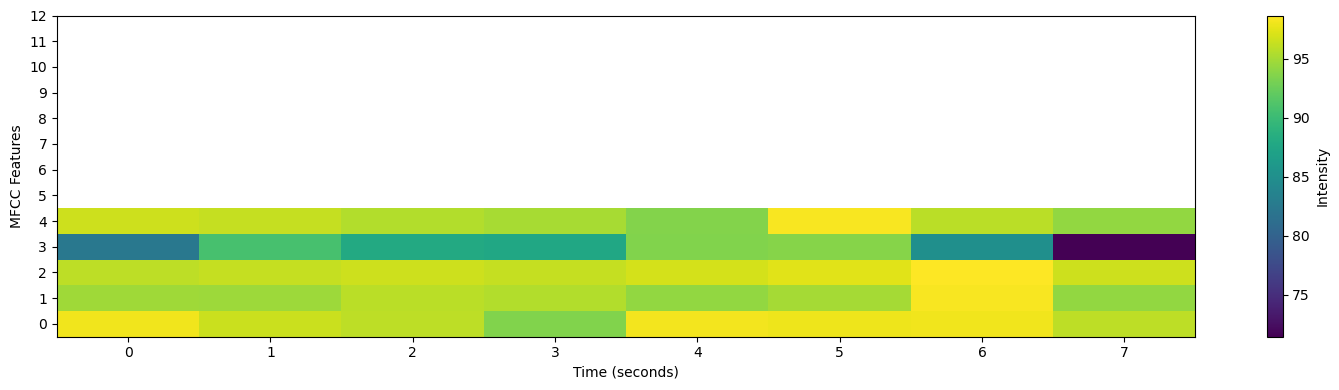

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Using iloc to select by integer-location based indexing for multiple rows
clips_data = df.iloc[4:50, :13].values  # Getting numpy array from the selected rows

# Create a heatmap
plt.figure(figsize=(15, 4))
plt.imshow(clips_data.T, aspect='auto', origin='lower', cmap='viridis')  # Note the transpose (.T)
plt.colorbar(label='Intensity')
plt.yticks(np.arange(0, 13, 1))
plt.ylabel('MFCC Features')
plt.xlabel('Time (seconds)')
plt.tight_layout()
plt.show()
